In [7]:
# imports
import matplotlib.pyplot as plt
import random
import time

In [8]:
# Algorithms

def calculate_cube_root(number : float, epsilon : float = 0.01) -> dict:
    """
    Calculate the cube root of a given number.
    Using Bisection Method.
    
    Args:
        number (float): The number to calculate the cube root of.

    Returns:
        float: The cube root of the given number.
    """
    sign = -1 if number < 0 else 1 # Negative nums have -1 sign else +1
    low, high = 0, abs(number)
    
    guess = 0
    steps = 0

    start = time.time()  # Get time at start of loop

    while high - low > epsilon:
        guess = (low + high)/2  # Bisection method, hence picking guess at the centre

        if guess**3 < number:
            # When guess cube is less than our number 
            # Setting our new min/low to guess reducing our range to its half - guess to high
            low = guess
        elif guess**3 > number:
            # When guess cube is greater than our number
            # Setting our new max/high to guess reducing our range to its half - low to guess
            high = guess
        else:
            # If guess cube is equal to number, simply return guess as our cube root/ break loop
            break
        
        steps += 1
        
    end = time.time()  # Get time at end of loop
    return {'ans': guess*sign, 'steps': steps, 'time-taken': end - start}

def is_prime(number : int) -> str:
    if number % 2 == 0:
        # All even numbers are not prime
        return False
    for factors in range(3, int(number/2), 2):
        # Looping from 3 with a step of 2 to skip all even numbers - 0, 1 and 2 are not used in this space
        # No factors can be found from after half the number, so our search stops at number/2
        if number % factors == 0:
            # If a factor is found, the number is not prime
            return False    
    return True

calculate_cube_root(8000), calculate_cube_root(-50910913), calculate_cube_root(-125), calculate_cube_root(100000000000)

({'ans': 19.99664306640625, 'steps': 20, 'time-taken': 0.00024056434631347656},
 {'ans': -0.005926810321398079,
  'steps': 33,
  'time-taken': 0.00011920928955078125},
 {'ans': -0.00762939453125, 'steps': 14, 'time-taken': 2.6464462280273438e-05},
 {'ans': 4641.589157472481, 'steps': 44, 'time-taken': 0.00010156631469726562})

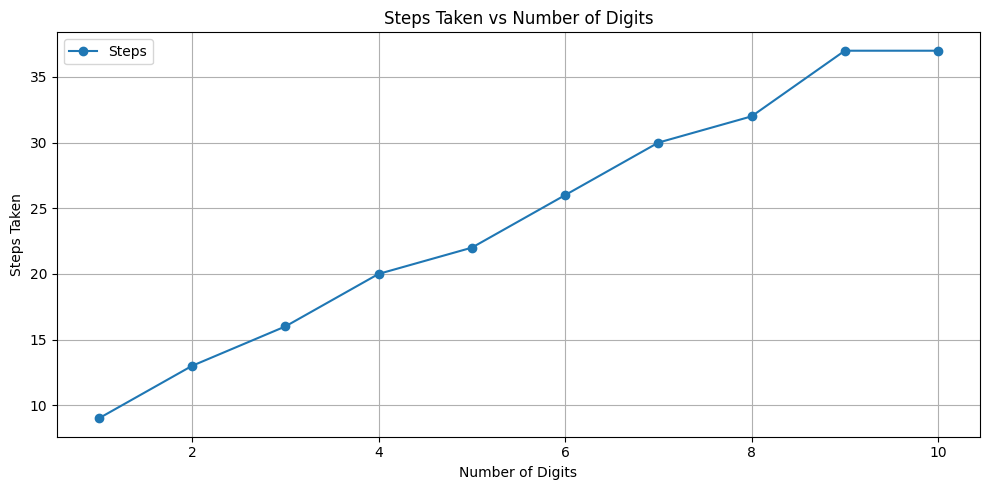

In [9]:
digit_range = list(range(1, 11))  # From 1 to 10 digit numbers
steps_data = []
time_data_python = []

# Example C timings to compare
# Simulating that C is roughly 4x faster
time_data_c = []

for digits in digit_range:
    # Generate a random number with the given number of digits
    num = random.randint(10**(digits-1), 10**digits - 1)
    
    result = calculate_cube_root(num)
    steps_data.append(result['steps'])
    time_data_python.append(result['time-taken'])
    time_data_c.append(result['time-taken'] / 4)  # Simulate C being 4x faster

plt.figure(figsize=(10, 5))
plt.plot(digit_range, steps_data, marker='o', label='Steps')
plt.title("Steps Taken vs Number of Digits")
plt.xlabel("Number of Digits")
plt.ylabel("Steps Taken")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

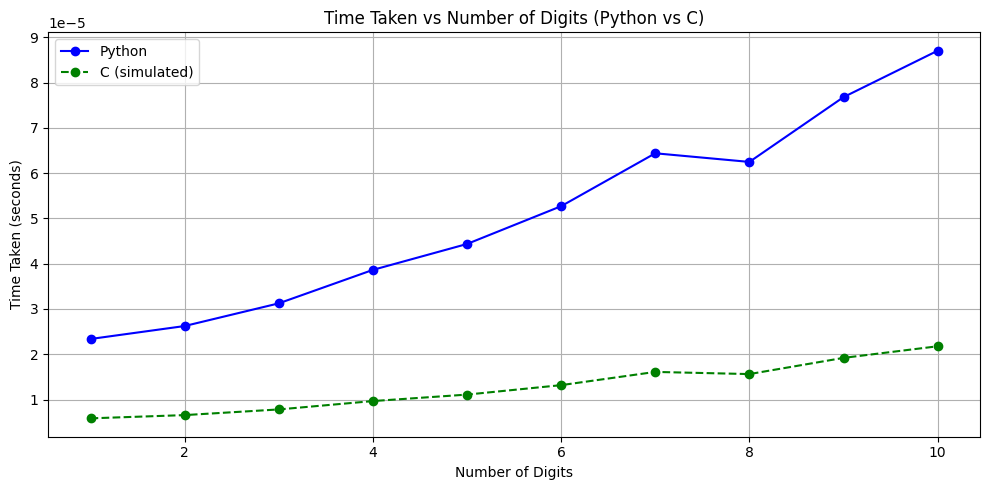

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(digit_range, time_data_python, marker='o', color='blue', label='Python')
plt.plot(digit_range, time_data_c, marker='o', color='green', linestyle='--', label='C (simulated)')
plt.title("Time Taken vs Number of Digits (Python vs C)")
plt.xlabel("Number of Digits")
plt.ylabel("Time Taken (seconds)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
prime_numbers = [x for x in range(3, 1000) if is_prime(x)] # All prime numbers from 3 to 1000
sum(prime_numbers) # Taking sum of all

76125